In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PrePlacement.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
!pip install seaborn

In [6]:
import seaborn as sns

C:\Users\sindhiya maria\AppData\Local\Temp\ipykernel_20048\569215799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

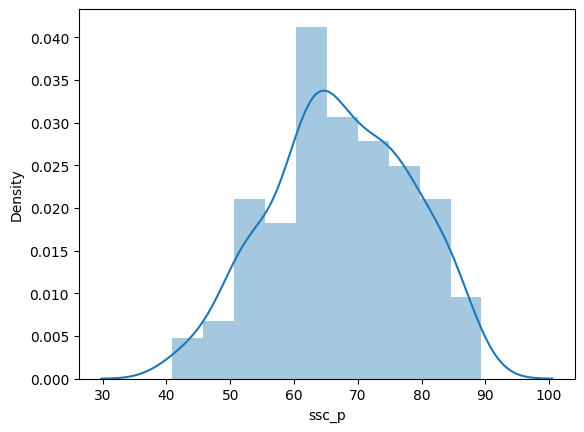

In [7]:
sns.distplot(dataset["ssc_p"])
#sns.histplot(dataset["ssc_p"],kde=True)

<Axes: xlabel='ssc_p', ylabel='Count'>

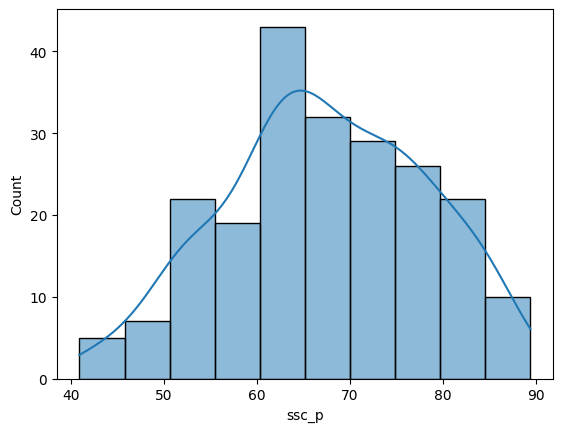

In [8]:
sns.histplot(dataset["ssc_p"],kde=True)

In [9]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    
    

# Explanation of for loop using basic level of understanding

In [10]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.displot(dataset, kde=True)
    #ax = sns.displot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    # Initialize an empty list to store the values
    values = []
  # Use a for loop to populate the values list with integers from startrange to endrange-1
    for value in range(startrange, endrange):
        values.append(value)
    # Print the values list to check
    print("Values:", values)
    # Initialize an empty list to store the probabilities
    probabilities = []
    # Use a for loop to calculate the PDF for each value and store it in the probabilities list
    for value in values:
        prob = dist.pdf(value)
        probabilities.append(prob)
    # Print the probabilities list to check
    print("Probabilities:", probabilities)
    # Calculate the sum of all probabilities
    prob = sum(probabilities)
    # Print the area between the specified range
    print("The area between range({}, {}): {}".format(startrange, endrange, prob))
    # Return the total probability
    return prob
    

Mean=67.303, Standard Deviation=10.827
Values: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Probabilities: [0.0015329114224828535, 0.0019267051556190002, 0.002401091837106753, 0.002966863705543068, 0.003634810156509462, 0.004415309815023451, 0.005317848311682825, 0.006350472216915636, 0.0075191960450905265, 0.008827385817478143]
The area between range(40, 50): 0.04489259448345172


0.04489259448345172

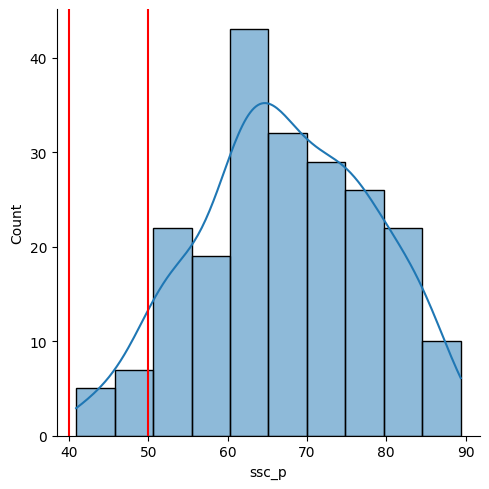

In [11]:
get_pdf_probability(dataset["ssc_p"],40,50)

Mean=67.303, Standard Deviation=10.827
Values: []
Probabilities: []
The area between range(40, 40): 0


0

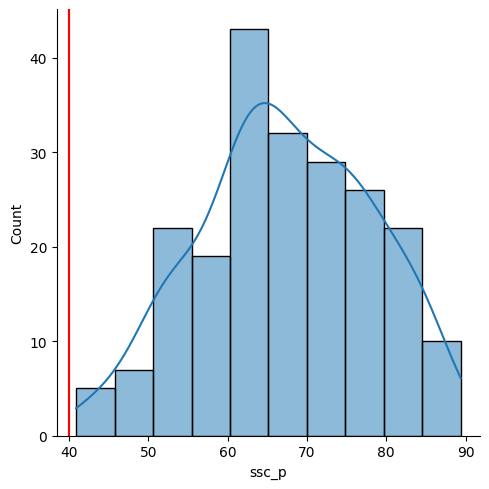

In [12]:
get_pdf_probability(dataset["ssc_p"],40,40)

Mean=67.303, Standard Deviation=10.827
Values: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Probabilities: [0.010275148846718499, 0.011858764583155554, 0.013570194930153937, 0.015396713811418094, 0.01732069447798158, 0.019319588759641553, 0.021366125100358083, 0.023428741938312646, 0.025472260251149254, 0.027458784613159832]
The area between range(50, 60): 0.18546701731204907


0.18546701731204907

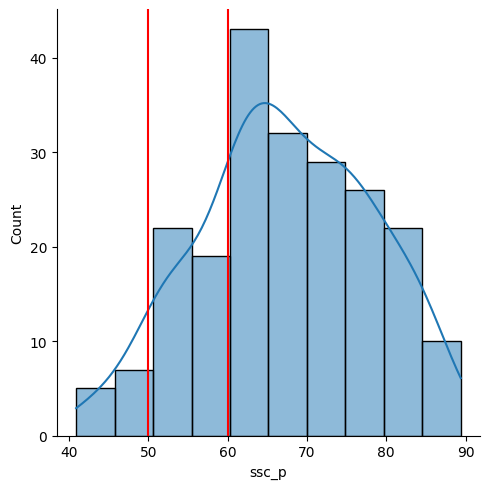

In [17]:
get_pdf_probability(dataset["ssc_p"],50,60)

Mean=67.303, Standard Deviation=10.827
Values: [65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
Probabilities: [0.036021835597530534, 0.03658026570377481, 0.03683182040123766, 0.03677010122906173, 0.03639668075742896, 0.03572103599626337, 0.034760148667713334, 0.03353779587976735, 0.03208357256215689, 0.030431701757499416]
The area between range(65, 75): 0.34913495855243404


0.34913495855243404

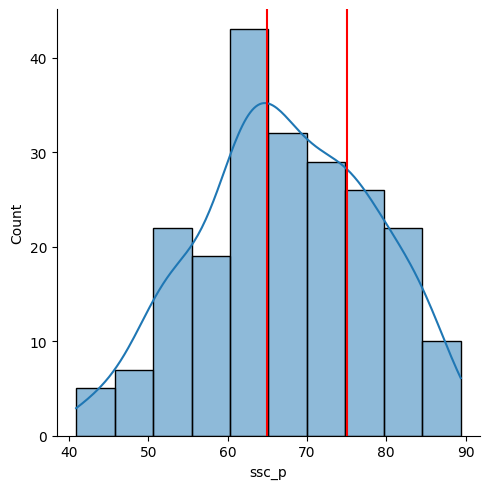

In [18]:
get_pdf_probability(dataset["ssc_p"],65,75)